In [ ]:
from collections import defaultdict
import random


class FrequencyModel:
    def __init__(self):
        # Store word transitions: {word: {next_word: frequency}}
        self.transitions = defaultdict(lambda: defaultdict(int))
        # Store words that appear at the start of sentences
        self.sentence_starters = []

    def train(self, text):
        """Train the model on the input text."""
        # Split text into sentences (simple implementation)
        sentences = text.replace('!', '.').replace('?', '.').split('.')

        for sentence in sentences:
            # Clean and split the sentence into words
            words = sentence.strip().lower().split()
            if len(words) < 2:
                continue

            # Add first word to sentence starters
            self.sentence_starters.append(words[0])

            # Build transitions dictionary
            for i in range(len(words) - 1):
                current_word = words[i]
                next_word = words[i + 1]
                self.transitions[current_word][next_word] += 1

    def get_next_word(self, current_word):
        """Get the next word based on transition probabilities."""
        if current_word not in self.transitions:
            return None

        # Get possible next words and their frequencies
        possibilities = self.transitions[current_word]
        words = list(possibilities.keys())
        weights = list(possibilities.values())

        return random.choices(words, weights=weights)[0]

    def generate_sentence(self, start_word=None, max_length=30):
        """Generate a sentence starting with the given word."""
        if start_word is None:
            # If no start word provided, randomly choose one from sentence starters
            if not self.sentence_starters:
                return "No training data available."
            start_word = random.choice(self.sentence_starters)

        # Convert start word to lowercase for consistency
        start_word = start_word.lower()

        # Initialize sentence with start word
        sentence = [start_word]
        current_word = start_word

        # Generate the rest of the sentence
        while len(sentence) < max_length:
            next_word = self.get_next_word(current_word)

            # If no next word is found or we reach a terminal word, stop
            if next_word is None:
                break

            sentence.append(next_word)
            current_word = next_word

            # Stop if we reach a natural ending (word with no transitions)
            if current_word not in self.transitions:
                break

        # Capitalize first word and join with spaces
        sentence[0] = sentence[0].capitalize()
        return " ".join(sentence) + "."

In [ ]:
# https://si.wikipedia.org/wiki/%E0%B6%9A%E0%B7%9C%E0%B7%85%E0%B6%B9_%E0%B7%80%E0%B7%92%E0%B7%81%E0%B7%8A%E0%B7%80%E0%B7%80%E0%B7%92%E0%B6%AF%E0%B7%8A%E2%80%8D%E0%B6%BA%E0%B7%8F%E0%B6%BD%E0%B6%BA%E0%B7%93%E0%B6%BA_%E0%B6%B4%E0%B6%BB%E0%B7%92%E0%B6%9C%E0%B6%AB%E0%B6%9A_%E0%B6%85%E0%B6%B0%E0%B7%8A%E2%80%8D%E0%B6%BA%E0%B6%BA%E0%B6%B1%E0%B7%8F%E0%B6%BA%E0%B6%AD%E0%B6%B1%E0%B6%BA

sample_text = """
කොළඹ විශ්වවිද්‍යාලයීය පරිගණක අධ්‍යයනායතනය (UCSC) යනු පරිගණක විද්‍යාව සහ තොරතුරු හා සන්නිවේදන තාක්ෂණය පිළිබඳ අධ්‍යාපනය ලබාදෙන, කොළඹ විශ්වවිද්‍යාලයට අනුබද්ධ අධ්‍යනායතනයකි. වසර 2002 සැප්තැම්බර් 01 දින, කොළඹ විශ්වවිද්‍යාලයීය විද්‍යා පීඨයේ පරිගණක දෙපාර්තමේන්තුව හා පරිගණක තාක්‌ෂණ ආයතනය (ICT) ඒකාබද්ධ කිරීමෙන් කොළඹ විශ්වවිද්‍යාලයීය පරිගණක අධ්‍යයනායතන පිහිටුවන ලදී. ශ්‍රී ලංකාවේ තොරතුරු සහ සන්නිවේදන තාක්‍ෂණ උසස්‌ අධ්‍යාපන ක්‍ෂේත්‍රයේ පුරෝගාමී ආයතනයක්‌ වන කොළඹ විශ්වවිද්‍යාලයීය පරිගණක අධ්‍යයනායතනය, එහි 25 වන සංවත්සරය 2010 වසරේදී සැමරීය.

කොළඹ විශ්වවිද්‍යාලය තුල පරිගණක අධ්‍යාපනය ආරම්භ වන්නේ වර්ෂ 1967 දී විද්‍යා පීඨයේ ගණිත අධ්‍යයනාංශයට සම්බන්ධ වෙනම ඒකකයක් ලෙස සංඛ්‍යාන විද්‍යා ඒකකය (Statistical Unit) ඇරඹීමත් සමගයි. පසුව මෙම ඒකකය සංඛ්‍යාන උපදේශන සහ දත්ත සැකසීමේ සේවා මධ්‍යස්ථානය (Statistical Consultancy and Data Processing Service Center) ලෙස වර්ධනය විය. වර්ෂ 1985 දී මහාචාර්ය

වී.කේ. සමරනායක මහතාගේ යෝජනාවකට අනුව සංඛ්‍යාන සහ පරිගණක විද්‍යා අධ්‍යයනාංශය (Department of Statistics and Computer Science) ආරම්භ කරන ලදී. මෙම අධ්‍යයනාංශය කොළඹ විශ්වවිද්‍යාලයීය පරිගණක අධ්‍යයනායතනයේ තිඹිරිගෙය ලෙස හඳුන්වනු ලැබේ. 2001 වසරේදී සංඛ්‍යාන සහ පරිගණක විද්‍යා අධ්‍යයනාංශය, පරිගණක විද්‍යා අධ්‍යයනාංශය (Department of Computer Science) සහ සංඛ්‍යාන විද්‍යා අධ්‍යයනාංශය (Depertment of Statistics) ලෙස කොටස් දෙකකට වෙන්කරන ලදී. වර්ෂ 1987 පිහිටුවන ලද පරිගණක තාක්‌ෂණ ආයතනය සහ පරිගණක විද්‍යා අධ්‍යයනාංශය ඒකාබද්ධ කරමින් 2002 වසරේ දී කොළඹ විශ්වවිද්‍යාලයීය පරිගණක අධ්‍යයනායතනය සංස්ථාපනය කරන ලදී.

අධ්‍යයනායතනයේ පළමු අධ්‍යක්ෂවරයා ලෙස මහාචාර්ය වී. කේ. සමරනායක මහතා පත්වූ අතර, විශ්‍රාම යාමෙන් පසුවද ස්වල්ප කාලයක් වැඩ බලන අධ්‍යක්ෂ ධූරයේ කටයුතු කළේය. 2004 වසරේදී අධ්‍යක්ෂ ධූරයට පත් වූ ආචාර්ය රුවන් වීරසිංහ මහතා සය වසරක් එම ධූරය හෙබවීය. ඉන් අනතුරුව 2010 වසරේදී අධ්‍යක්ෂ ධූරයට පත් වූ මහාචාර්ය ගිහාන් වික්‍රමනායක මහතා 2016 වසර දක්වා එම තනතුර හෙබවීය. වර්තමානයේදී මහාචාර්ය කේ. පි. හේවාගමගේ මහතා අධ්‍යක්‍ෂ ධූරය හොබවයි.

කොළඹ විශ්වවිද්‍යාලයීය පරිගණක අධ්‍යයනායතනය පරිගණක උසස් අධ්‍යාපනය සඳහා අවැසි සියලු තාක්ෂණික උපාංග වලින් සමන්විත වේ. එහි සිසුන් සඳහා වන පරිගණක විද්‍යාගාර 10 ක්‚ බහුමාධ්‍ය පරිගණක විද්‍යාගාර 02 ක්‚ පර්යේෂණ කටයුතු සඳහා වන විද්‍යාගාර 02 ක්‚ අන්තර්ජාල පහසුකම් සැපයීම පිණිස අධ්‍යයනායතනයේ ගොඩනැගිලි පරිශ්‍රය ම ආවරණය වන පරිදි සැකසූ ජාල පද්ධතියක් මේ අතර වේ. තවද‚ අධ්‍යයනායතනය සතුව අවශ්‍යතාවය අනුව සැකසිය හැකි ජාල ව්‍යාප්ත පද්ධතියක් ද ඇත. අධ්‍යයනායතනයේ පුස්තකාලය දුර්ලභ හා වටිනා පොත්-පත්, සඟරා, සංයුක්ත තැටි‚ ව්‍යාපෘති වාර්තා, පර්යේෂණ සටහන් විශාල ප්‍රමාණයකින් සමන්විත වන අතර, විද්‍යුත් සඟරා පරිශීලනය සඳහා අන්තර්ජාල පහසුකම්ද සපයා ඇත.

වර්තමානයේදී පරිගණක අධ්‍යයනායතනය විවිධ ක්ෂේත්‍රයන්හි පර්යේෂණ කටයුතු වල නිරතව සිටින අතර දේශීය භාෂා පරිශීලනය, මානව-පරිගණක අන්තර් ක්‍රියා අධ්‍යයනය‚ පින්තූර සැකසීම, පරිගණක ආරක්ෂණ පද්ධති නිර්මාණය‚ බහුමාධ්‍ය හා දෘෂ්‍ය යතාර්ථ (Virtual reality) භාවිතය‚ කෘත්‍රිම බුද්ධිය ආශ්‍රිත පරිගණක පද්ධති නිර්මාණය, රටා හඳුනා ගැනීම සඳහා වන වැඩසටහන්, තොරතුරු හා දත්ත විශ්ලේෂණය, අන්තර්ජාලය ආශ්‍රිත වෙළෙඳ කටයුතු, විද්‍යුත් අධ්‍යාපනික කටයුතු, තොරතුරු කළමනාකරණ තාක්ෂණය, තොරතුරු තාක්ෂණ නීති පද්ධති සැකසීම ඒ අතර ප්‍රධාන වේ.

කොළඹ විශ්ව විද්‍යාලයීය පරිගණක අධ්‍යයනායතනයේ ප්‍රධාන අභිමතාර්ථය වනුයේ, මෘදූකාංග නිෂ්පාදනය‚ පරිගණක පද්ධති විශ්ලේෂණය, ජාල අධීක්ෂණය, දත්ත ගොනු අධීක්ෂණය, ලෝක ව්‍යාප්ති ජාලය ආශ්‍රිත තොරතුරු පද්ධති නිර්මාණය, තොරතුරු කළමනාකරණය හා තොරතුරු තාක්ෂණ නීති පද්ධති ක්‍රියාත්මක කිරීම ආදී වෘත්තීය ක්ෂේත්‍ර වලට අදාළ වන පරිදි සිසුන්ට අධ්‍යාපනය හා ප්‍රායෝගික පුහුණුව ලබා දීමයි.
"""

# Create and train the model
generator = FrequencyModel()
generator.train(sample_text)

# Generate sentences with different start words
print("Starting with 'කොළඹ':", generator.generate_sentence("කොළඹ"))
print("Starting with 'පරිගණක':", generator.generate_sentence("පරිගණක"))
print("Random start:", generator.generate_sentence())

Starting with 'කොළඹ': කොළඹ විශ්වවිද්‍යාලය තුල පරිගණක විද්‍යා අධ්‍යයනාංශය, පරිගණක විද්‍යාගාර 02 ක්‚ අන්තර්ජාල පහසුකම් සැපයීම පිණිස අධ්‍යයනායතනයේ ගොඩනැගිලි පරිශ්‍රය ම ආවරණය වන පරිගණක විද්‍යා අධ්‍යයනාංශය (department of computer science) සහ පරිගණක තාක්‌ෂණ.
Starting with 'පරිගණක': පරිගණක අධ්‍යාපනය සඳහා අවැසි සියලු තාක්ෂණික උපාංග වලින් සමන්විත වේ.
Random start: අධ්‍යයනායතනයේ ප්‍රධාන වේ.


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import random
import numpy as np

class FrequencyModelVisualizer:
    def __init__(self, freq_chain):
        """
        Initialize visualizer with a FreqencyModelGenerator instance
        """
        self.freq_chain = freq_chain
        self.G = nx.DiGraph()
        self.show_labels = True
        self.edge_label_size = 6
        self.node_label_size = 8

    def _calculate_edge_weights(self):
        """Calculate normalized edge weights for visualization"""
        edge_weights = []
        edge_probabilities = {}

        for u, v, d in self.G.edges(data=True):
            total_transitions = sum(self.freq_chain.transitions[u].values())
            probability = d['weight'] / total_transitions
            edge_probabilities[(u, v)] = probability
            edge_weights.append(d['weight'])

        if edge_weights:
            max_weight = max(edge_weights)
            min_weight = min(edge_weights)

            # Normalize weights to range [0.5, 5] for visibility
            normalized_weights = []
            for weight in edge_weights:
                if max_weight == min_weight:
                    normalized_weights.append(2.0)
                else:
                    norm_weight = 0.5 + 4.5 * (weight - min_weight) / (max_weight - min_weight)
                    normalized_weights.append(norm_weight)

            return normalized_weights, edge_probabilities
        return [], {}

    def _calculate_node_sizes(self):
        """Calculate node sizes based on frequency of word occurrence"""
        sizes = []
        for node in self.G.nodes():
            # Count total transitions from this word
            total = sum(self.freq_chain.transitions[node].values())
            # Scale node size (min 500, max 3000)
            sizes.append(500 + min(2500, total * 200))
        return sizes

    def create_graph(self, max_nodes=50):
        """Create NetworkX graph from word frequencies transitions"""
        self.G.clear()
        # Add nodes and edges from transition matrix
        added_nodes = set()

        # Sort words by frequency to show most important ones
        word_frequencies = {}
        for word, transitions in self.freq_chain.transitions.items():
            word_frequencies[word] = sum(transitions.values())

        # Get most frequent words
        sorted_words = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)
        top_words = [word for word, freq in sorted_words[:max_nodes]]

        # Add edges for top words
        for word in top_words:
            if word not in added_nodes:
                self.G.add_node(word)
                added_nodes.add(word)

            for next_word, frequency in self.freq_chain.transitions[word].items():
                if next_word in top_words:
                    if next_word not in added_nodes:
                        self.G.add_node(next_word)
                        added_nodes.add(next_word)
                    self.G.add_edge(word, next_word, weight=frequency)

    def visualize(self, title="Word Frequency based model Visualization", figsize=(15, 10)):
        plt.figure(figsize=figsize)

        # Use spring layout for node positioning
        pos = nx.spring_layout(self.G, k=1, iterations=50)

        # Calculate visual properties
        edge_weights, edge_probabilities = self._calculate_edge_weights()
        node_sizes = self._calculate_node_sizes()

        # Create edge labels with probabilities
        edge_labels = {(u, v): f'{prob:.2f}'
                      for (u, v), prob in edge_probabilities.items()}

        # Draw the graph
        nx.draw_networkx_nodes(self.G, pos,
                             node_color='lightblue',
                             node_size=node_sizes,
                             alpha=0.7)

        # Draw edges with varying widths based on transition probabilities
        nx.draw_networkx_edges(self.G, pos,
                             edge_color='gray',
                             width=edge_weights,
                             alpha=0.6,
                             arrowsize=20)

        nx.draw_networkx_labels(self.G, pos,
                                font_size=self.node_label_size,
                                font_weight='bold')

        nx.draw_networkx_edge_labels(self.G, pos,
                                    edge_labels=edge_labels,
                                    font_size=self.edge_label_size)

        # Add labels
        nx.draw_networkx_labels(self.G, pos,
                              font_size=8,
                              font_weight='bold')

        plt.title(title, fontsize=16, pad=20)
        plt.axis('off')
        plt.tight_layout()

        return plt


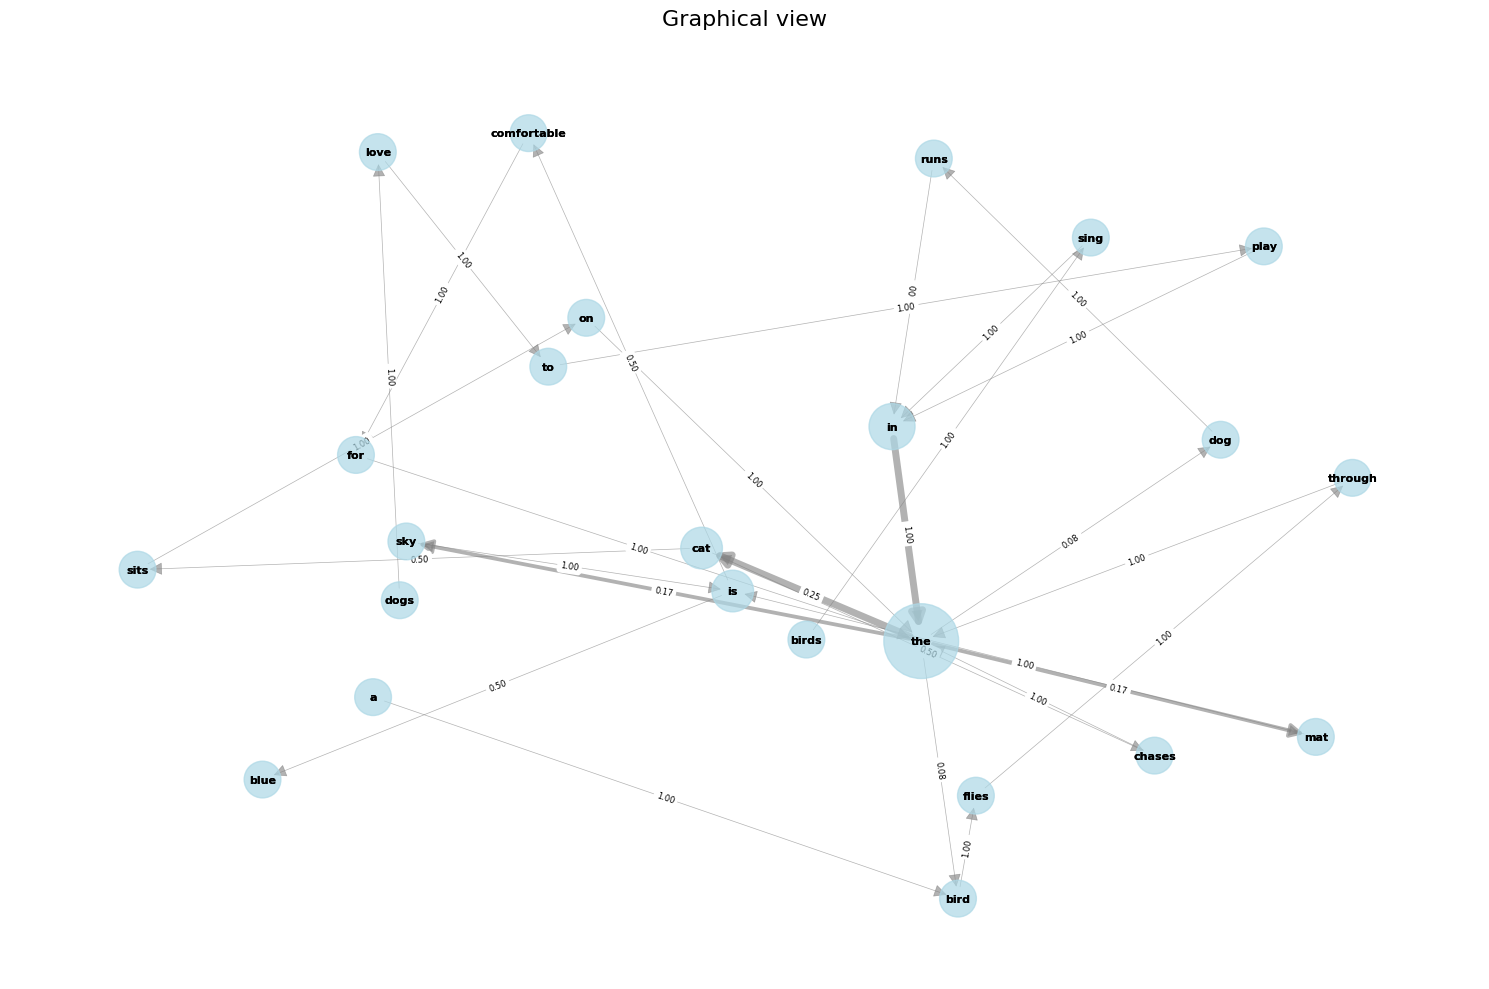

In [ ]:
sample_text = """
The cat sits on the mat. The dog runs in the park.
A bird flies through the sky. The cat chases the bird.
Dogs love to play in the park. Birds sing in the trees.
The mat is comfortable for the cat. The sky is blue today.
"""

generator = FrequencyModel()
generator.train(sample_text)

# Create and display visualization
visualizer = FrequencyModelVisualizer(generator)
visualizer.create_graph(max_nodes=50)
plt = visualizer.visualize(title="Graphical view")
plt.show()